In [ ]:
#Pratham Shah
#IU1941230155

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
neigh = KNeighborsClassifier(n_neighbors=14)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25,n_estimators=100)
from sklearn.tree import DecisionTreeClassifier
cl2 = DecisionTreeClassifier(random_state=0)
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DS/income(1).csv", na_values = [' ?'])
data
data2 = data.dropna()

In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

Variables and their types

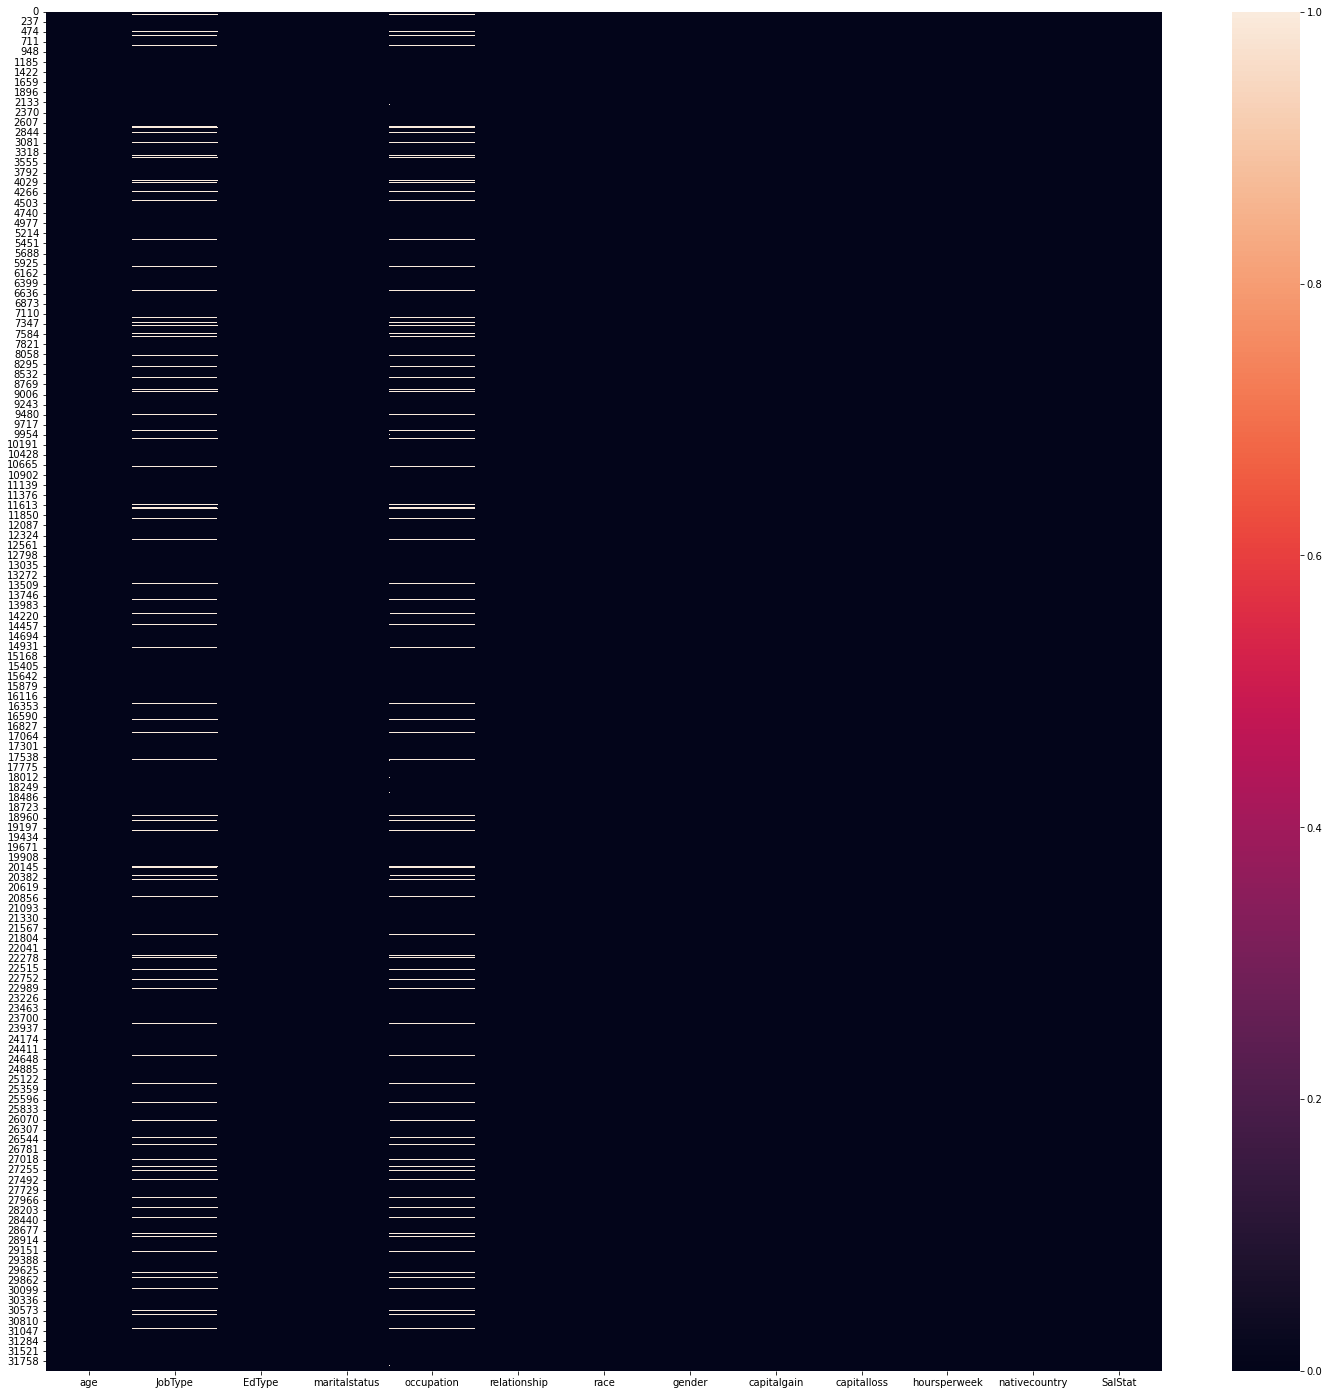

In [ ]:
data
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull())


Variable Statistics


In [ ]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Is the data clean?

In [ ]:
data2.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

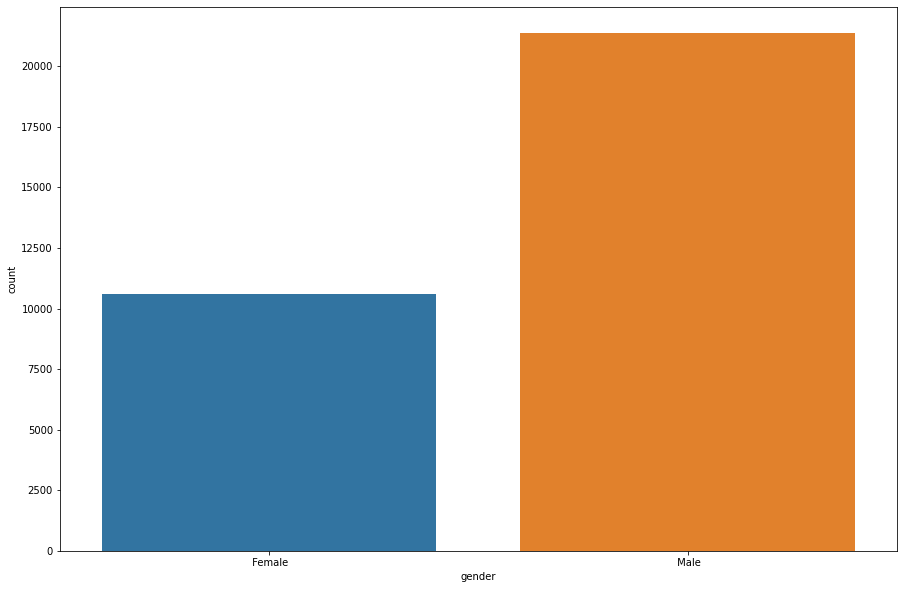

In [ ]:
ax, fig = plt.subplots(figsize=[15,10])
sns.countplot(x=data.gender)

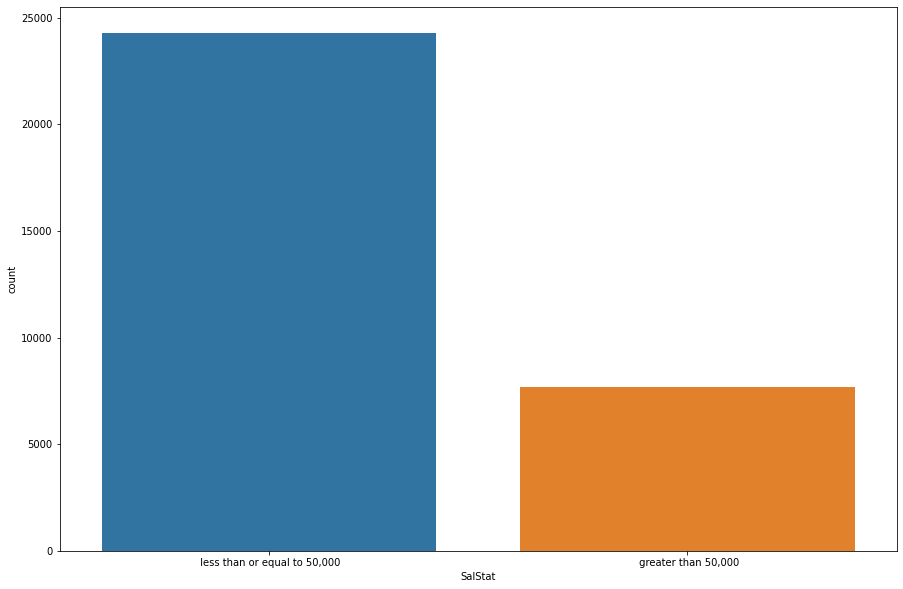

In [ ]:
ax, fig = plt.subplots(figsize=[15,10])
sns.countplot(x=data.SalStat)

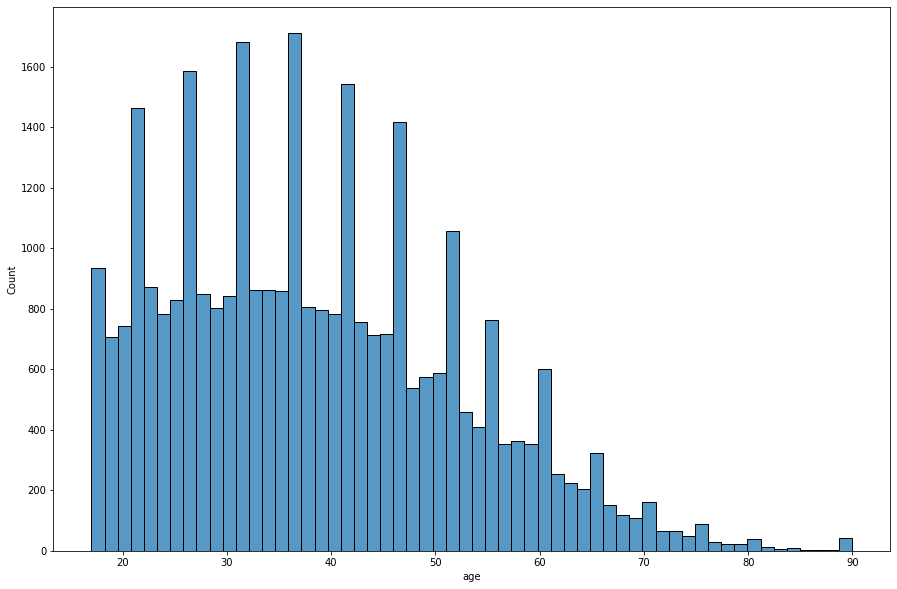

In [ ]:
ax, fig = plt.subplots(figsize=[15,10])
sns.histplot(x=data.age, kde=False)

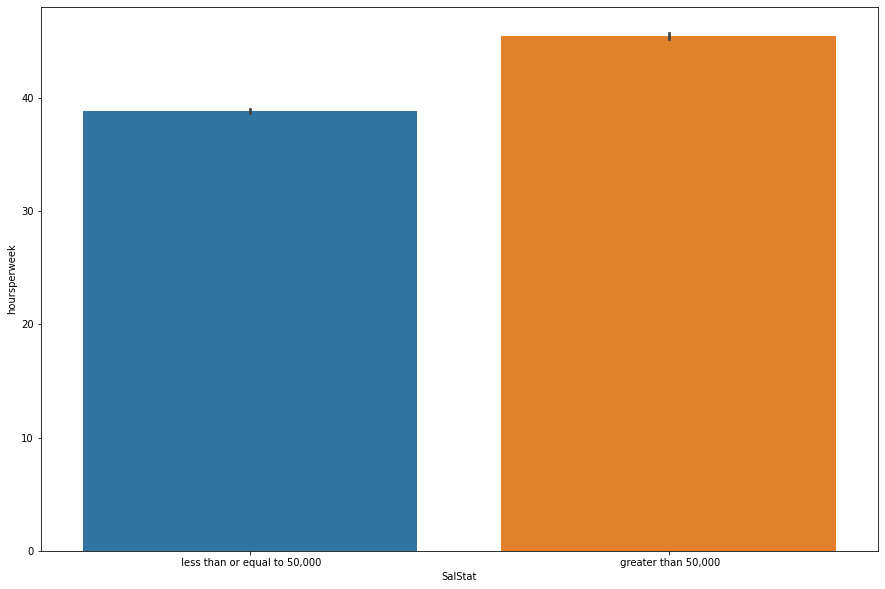

In [ ]:
ax, fig = plt.subplots(figsize=[15,10])
sns.barplot(y='hoursperweek', x='SalStat', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


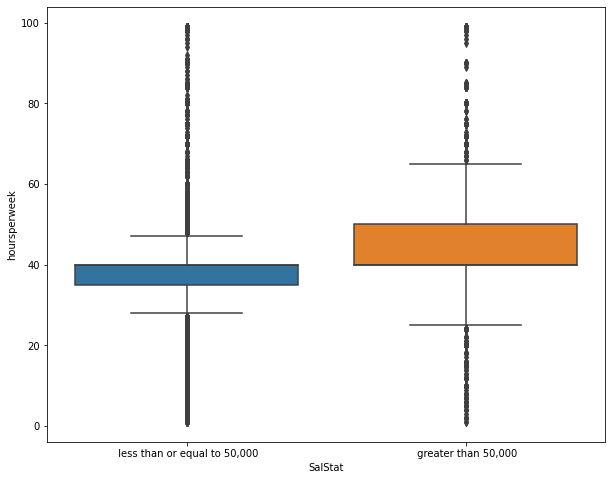

In [ ]:
ax, fig = plt.subplots(figsize=[10,8])
sns.boxplot('SalStat','hoursperweek',data = data)


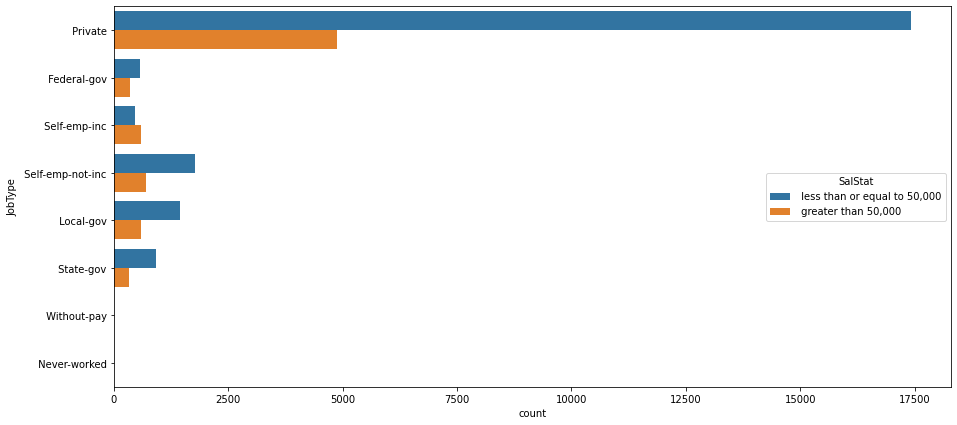

In [ ]:
ax, fig = plt.subplots(figsize=[15,7])
JobType   = sns.countplot(y=data['JobType'],hue = 'SalStat', data=data)


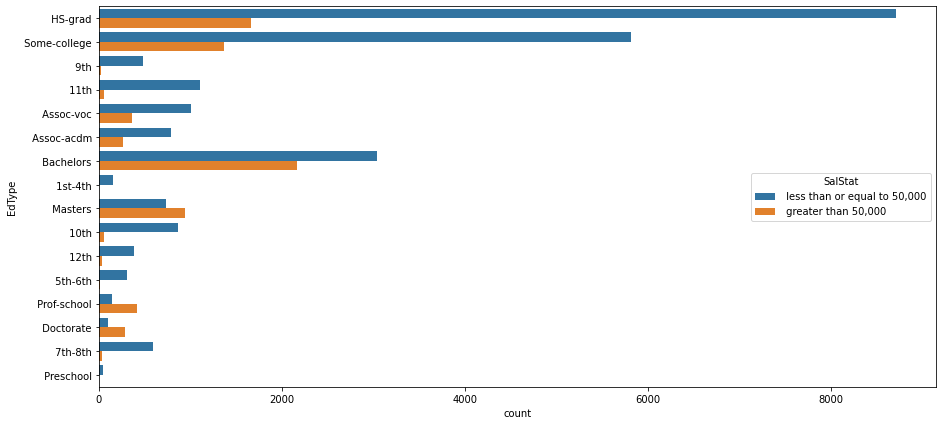

In [ ]:
ax, fig = plt.subplots(figsize=[15,7])
Education   = sns.countplot(y=data['EdType'],hue = 'SalStat', data=data)

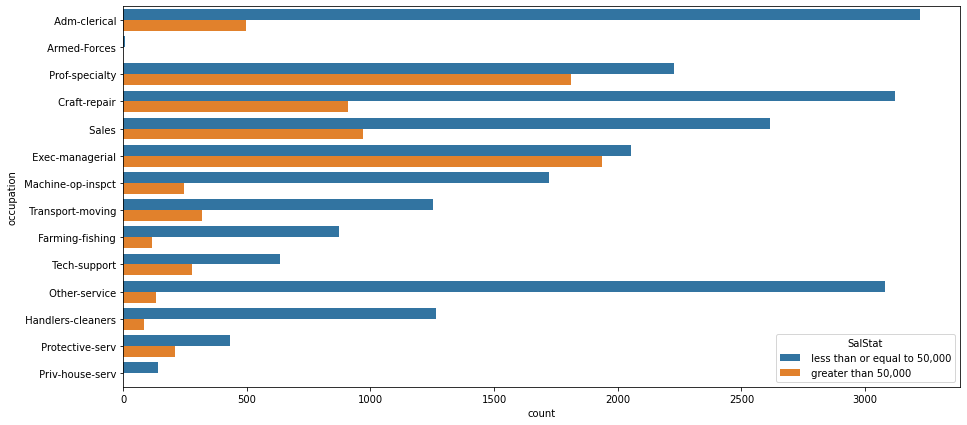

In [ ]:
ax, fig = plt.subplots(figsize=[15,7])
Occupation  = sns.countplot(y=data['occupation'],hue = 'SalStat', data=data)

In [ ]:
lb = LabelEncoder()

for i in ['JobType', 'EdType', 'occupation', 'gender', 'SalStat','EdType','occupation', 'hoursperweek','gender','nativecountry','maritalstatus','relationship','race']:
    print(i)
    X = data2[i]
    X = lb.fit_transform(X)
    data2[i] = X
    print(X)

JobType
[2 0 2 ... 2 1 2]
EdType
[11 11 15 ... 15 15  9]
occupation
[0 1 9 ... 0 0 9]
gender
[0 1 1 ... 1 0 1]
SalStat
[1 1 0 ... 1 1 1]
EdType
[11 11 15 ... 15 15  9]
occupation
[0 1 9 ... 0 0 9]
hoursperweek
[27 39 39 ... 39 39 39]
gender
[0 1 1 ... 1 0 1]
nativecountry
[38 38 38 ... 38 38 38]
maritalstatus
[0 4 2 ... 2 2 4]
relationship
[1 3 0 ... 0 5 1]
race
[4 4 4 ... 4 4 4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data2.drop("SalStat", axis=1), data2.SalStat, test_size=0.20, random_state=0)

In [ ]:
names = ['KNN','NaiveBayes', 'RandomForest', 'DecisionTree','LogisticRegression']
model_list = [neigh, gnb, clf,cl2,lg]
models = dict()
from sklearn.metrics import accuracy_score
for n in names:
    models[n]=model_list[names.index(n)]
from sklearn.metrics import r2_score
scores = pd.DataFrame(data=np.empty(shape=(5,2)), index=models.keys(), columns=["Accuracy",'Accuracy over train data'])
for model, name in zip(models.values(), models.keys()):
    print(model)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    pred2 = model.predict(xtrain)
    acc = accuracy_score(ytest, pred)
    acc2 = accuracy_score(ytrain, pred2)
    scores.loc[name,'Accuracy'] = acc*100
    scores.loc[name, 'Accuracy over train data'] = acc2*100

KNeighborsClassifier(n_neighbors=14)
GaussianNB()
RandomForestClassifier(max_depth=25)
DecisionTreeClassifier(random_state=0)
LogisticRegression(random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores

,Accuracy,Accuracy over train data
KNN,82.380242,85.233536
NaiveBayes,78.965689,79.116416
RandomForest,85.032322,97.119649
DecisionTree,80.656390,97.811762
LogisticRegression,79.081717,79.447967


In [ ]:
"""

features = ['age', 'JobType','EdType','occupation','gender','hoursperweek','SalStat']
#'EdType','occupation', 'hoursperweek', 'SalStat','gender','nativecountry']
drop_col = []
for i in list(data2.columns):
    if i not in features:
        drop_col.append(i)
data2.drop(list(drop_col), inplace=True, axis=1)
data2 = data2.drop
"""

"""
job_salstat =pd.crosstab(index = data["JobType"],columns = data['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)
"""


"""EdType_salstat = pd.crosstab(index = data["EdType"], columns = data['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)"""

"""occ_salstat = pd.crosstab(index = data["occupation"], columns = data['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)"""

#from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#lin_reg, ridge_reg, lasso_reg, elas_net = LinearRegression(), Ridge(), Lasso(), ElasticNet()
    #scores.loc[name,'Test']=test_r2
    #print(ytspred2)
    #cores.loc[name,'AccuracyScore']=accuracy_score(xtest, ytspred2)